In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


In [2]:
nft_profits_df = pd.read_csv('nft_exact_mevs_profits_df.csv')
meme_profits_df = pd.read_csv('meme_exact_mevs_profits_df.csv')
classic_profits_df = pd.read_csv('classic_exact_mevs_profits_df.csv')
shares_sto_profits_df = pd.read_csv('shares_sto_exact_mevs_profits_df.csv')
non_shares_sto_profits_df = pd.read_csv('non_shares_sto_exact_mevs_profits_df.csv')

grouped_by_timestamps_nft_profits_df = pd.read_csv('timestamp_grouped_nft_exact_mevs_profits_df.csv')
grouped_by_timestamps_meme_profits_df = pd.read_csv('timestamp_grouped_meme_exact_mevs_profits_df.csv')
grouped_by_timestamps_classic_profits_df = pd.read_csv('timestamp_grouped_classic_exact_mevs_profits_df.csv')
grouped_by_timestamps_non_shares_sto_profits_df = pd.read_csv('timestamp_grouped_non_shares_sto_exact_mevs_profits_df.csv')
grouped_by_timestamps_shares_sto_profits_df = pd.read_csv('timestamp_grouped_shares_sto_exact_mevs_profits_df.csv')

In [3]:
total_grouped_profits_list = [grouped_by_timestamps_nft_profits_df, grouped_by_timestamps_meme_profits_df,
                            grouped_by_timestamps_classic_profits_df, grouped_by_timestamps_shares_sto_profits_df,
                            grouped_by_timestamps_non_shares_sto_profits_df]
total_grouped_profits_df = pd.concat(total_grouped_profits_list)
total_grouped_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14033 entries, 0 to 39
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14033 non-null  int64  
 1   timestamp           14033 non-null  object 
 2   index               14033 non-null  int64  
 3   amount_usd          13967 non-null  float64
 4   block               14033 non-null  float64
 5   bruto_total_profit  14033 non-null  float64
 6   gas_usage_by_tx     14033 non-null  float64
 7   gas_costs_usd       14033 non-null  float64
 8   netto_profit        14033 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [4]:
total_grouped_profits_df['timestamp'] = pd.to_datetime(total_grouped_profits_df['timestamp'])

In [5]:
total_profits_list = [nft_profits_df, meme_profits_df, classic_profits_df, shares_sto_profits_df,
                      non_shares_sto_profits_df]
total_profits_df = pd.concat(total_profits_list)
total_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28617 non-null  int64  
 1   index               28617 non-null  int64  
 2   timestamp           28617 non-null  object 
 3   sender              28617 non-null  object 
 4   amount_usd          28485 non-null  float64
 5   to                  28617 non-null  object 
 6   txd                 28617 non-null  object 
 7   block               28617 non-null  float64
 8   block_position      28617 non-null  float64
 9   bruto_total_profit  28617 non-null  float64
 10  tx_fee              28617 non-null  float64
 11  gas_usage_by_tx     28617 non-null  float64
 12  gas_costs_usd       28617 non-null  float64
 13  netto_profit        28617 non-null  float64
 14  pool_name           28617 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 3.5+ MB

In [6]:
total_profits_df['pool_name'].unique()

array(['ENJ/WETH', 'MANA/WETH', 'SAND/WETH', 'ALICE/WETH', 'AXS/WETH',
       'SHIB/WETH', 'DOGE/WETH', 'ELON/WETH', 'WETH/USDC', 'WBTC/USDC',
       'FEI/WETH', 'WBTC/DAI', 'IXS/WETH', 'HKMT/USDT', 'mAMZN/UST',
       'mAAPL/UST', 'mBABA/UST', 'BPT/WETH', 'PERL/WETH'], dtype=object)

In [7]:
total_profits_df['timestamp'] = pd.to_datetime(total_profits_df['timestamp'])

# Metrics of all collected pools

In [8]:
print("total collected netto profit = " + str(total_grouped_profits_df['netto_profit'].sum()))
print("total collected brutto profit = " + str(total_grouped_profits_df['bruto_total_profit'].sum()))
print("total gas spendings = " + str(total_grouped_profits_df['gas_costs_usd'].sum()))

total collected netto profit = 12172135.603068512
total collected brutto profit = 14541379.020869493
total gas spendings = 2369243.4178009834


In [9]:
enj_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ENJ/WETH'].sort_values(by='timestamp')
mana_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'MANA/WETH'].sort_values(by='timestamp')
sand_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'SAND/WETH'].sort_values(by='timestamp')
alice_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ALICE/WETH'].sort_values(by='timestamp')
axs_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'AXS/WETH'].sort_values(by='timestamp')
shib_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'SHIB/WETH'].sort_values(by='timestamp')
doge_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'DOGE/WETH'].sort_values(by='timestamp')
elon_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'ELON/WETH'].sort_values(by='timestamp')
weth_usdc_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WETH/USDC'].sort_values(by='timestamp')
wbtc_usdc_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WBTC/USDC'].sort_values(by='timestamp')
fei_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'FEI/WETH'].sort_values(by='timestamp')
wbtc_dai_profits_df = total_profits_df[total_profits_df['pool_name'] == 'WBTC/DAI'].sort_values(by='timestamp')
ixs_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'IXS/WETH'].sort_values(by='timestamp')
hkmt_usdt_profits_df = total_profits_df[total_profits_df['pool_name'] == 'HKMT/USDT'].sort_values(by='timestamp')
perl_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'PERL/WETH'].sort_values(by='timestamp')
bpt_weth_profits_df = total_profits_df[total_profits_df['pool_name'] == 'BPT/WETH'].sort_values(by='timestamp')
maapl_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mAAPL/UST'].sort_values(by='timestamp')
mbaba_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mBABA/UST'].sort_values(by='timestamp')
mamzn_ust_profits_df = total_profits_df[total_profits_df['pool_name'] == 'mAMZN/UST'].sort_values(by='timestamp')

# Plotting netto profits distributions by each category

## NFT pools

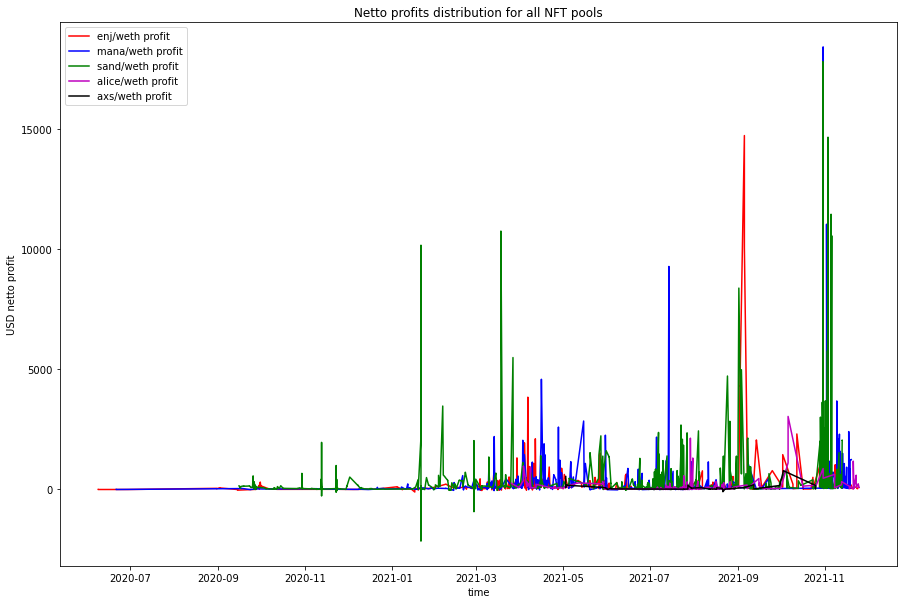

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(enj_weth_profits_df['timestamp'], enj_weth_profits_df['netto_profit'], color='r', label='enj/weth profit')
ax.plot(mana_weth_profits_df['timestamp'], mana_weth_profits_df['netto_profit'], color='b', label='mana/weth profit')
ax.plot(sand_weth_profits_df['timestamp'], sand_weth_profits_df['netto_profit'], color='g', label='sand/weth profit')
ax.plot(alice_weth_profits_df['timestamp'], alice_weth_profits_df['netto_profit'], color='m', label='alice/weth profit')
ax.plot(axs_weth_profits_df['timestamp'], axs_weth_profits_df['netto_profit'], color='black', label='axs/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all NFT pools')
ax.legend()
plt.show()

## Meme pools

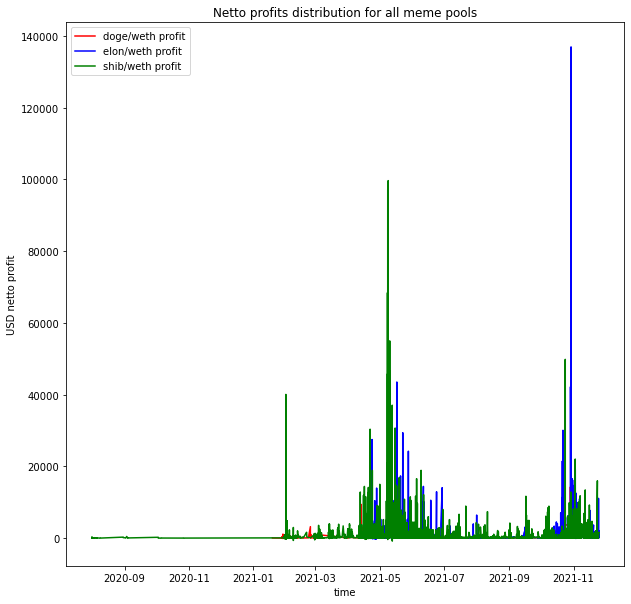

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(doge_weth_profits_df['timestamp'], doge_weth_profits_df['netto_profit'], color='r', label='doge/weth profit')
ax.plot(elon_weth_profits_df['timestamp'], elon_weth_profits_df['netto_profit'], color='b', label='elon/weth profit')
ax.plot(shib_weth_profits_df['timestamp'], shib_weth_profits_df['netto_profit'], color='g', label='shib/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all meme pools')
ax.legend()
plt.show()

## Classic pools

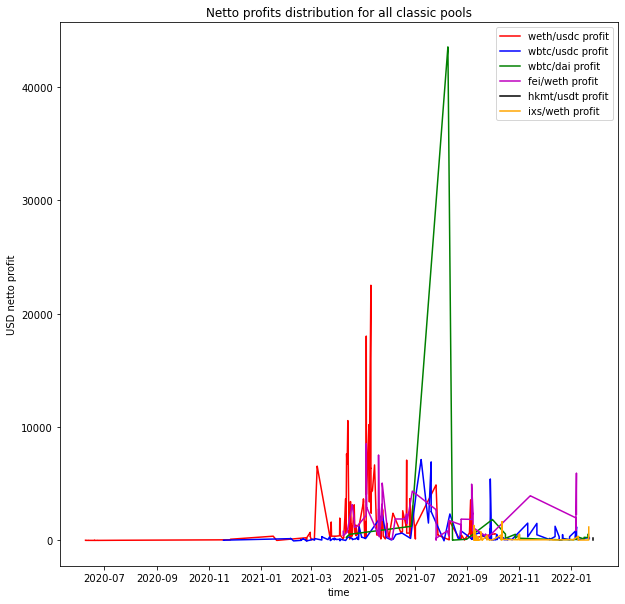

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weth_usdc_profits_df['timestamp'], weth_usdc_profits_df['netto_profit'], color='r', label='weth/usdc profit')
ax.plot(wbtc_usdc_profits_df['timestamp'], wbtc_usdc_profits_df['netto_profit'], color='b', label='wbtc/usdc profit')
ax.plot(wbtc_dai_profits_df['timestamp'], wbtc_dai_profits_df['netto_profit'], color='g', label='wbtc/dai profit')
ax.plot(fei_weth_profits_df['timestamp'], fei_weth_profits_df['netto_profit'], color='m', label='fei/weth profit')
ax.plot(hkmt_usdt_profits_df['timestamp'], hkmt_usdt_profits_df['netto_profit'], color='black', label='hkmt/usdt profit')
ax.plot(ixs_weth_profits_df['timestamp'], ixs_weth_profits_df['netto_profit'], color='orange', label='ixs/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all classic pools')
ax.legend()
plt.show()

## Shares STO pools

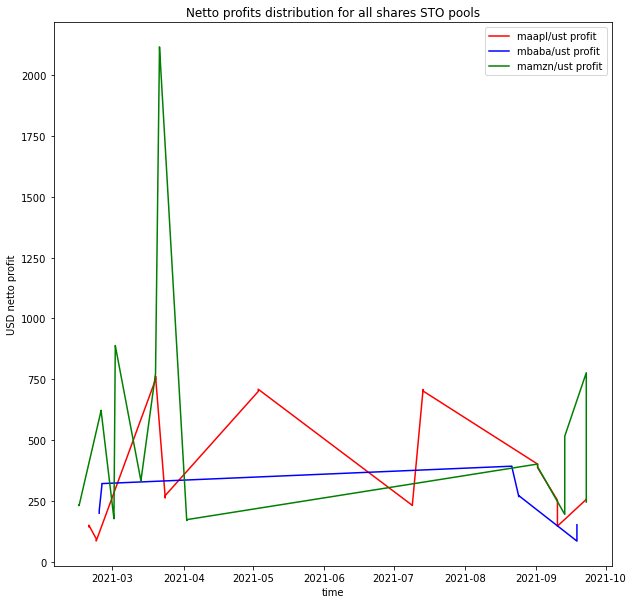

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['netto_profit'], color='r', label='maapl/ust profit')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['netto_profit'], color='b', label='mbaba/ust profit')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['netto_profit'], color='g', label='mamzn/ust profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all shares STO pools')
ax.legend()
plt.show()

## Non shares STO pools

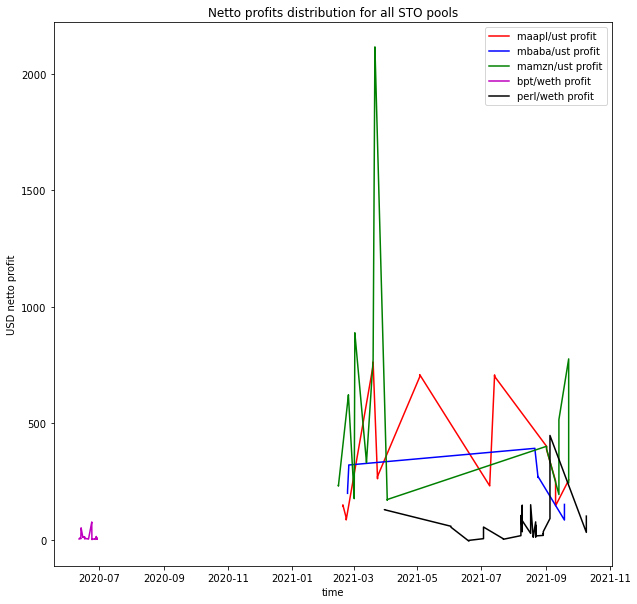

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['netto_profit'], color='r', label='maapl/ust profit')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['netto_profit'], color='b', label='mbaba/ust profit')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['netto_profit'], color='g', label='mamzn/ust profit')
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['netto_profit'], color='m', label='bpt/weth profit')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['netto_profit'], color='black', label='perl/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all STO pools')
ax.legend()
plt.show()

# Total STO pools

In [15]:
sto_profits_df = pd.concat([shares_sto_profits_df, non_shares_sto_profits_df])

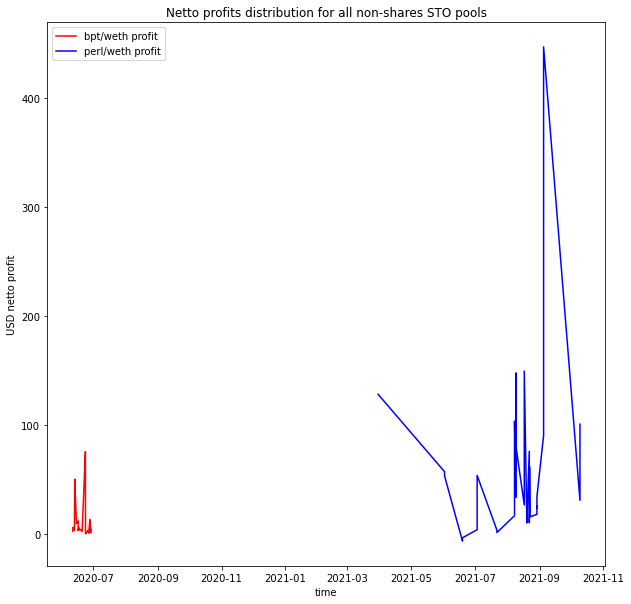

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['netto_profit'], color='r', label='bpt/weth profit')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['netto_profit'], color='b', label='perl/weth profit')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Netto profits distribution for all non-shares STO pools')
ax.legend()
plt.show()

# Plotting gas costs distributions by each category

## NFT pools

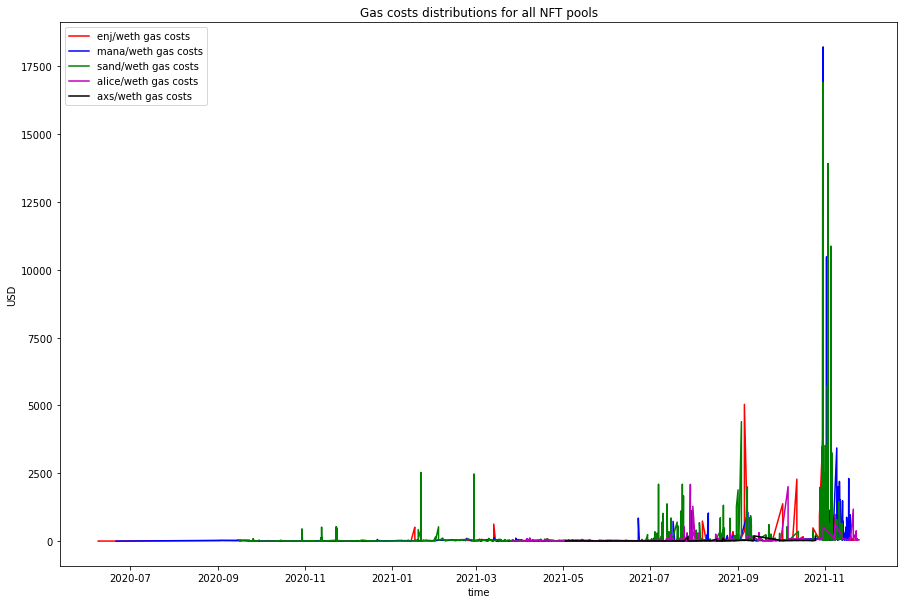

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(enj_weth_profits_df['timestamp'], enj_weth_profits_df['gas_costs_usd'], color='r', label='enj/weth gas costs')
ax.plot(mana_weth_profits_df['timestamp'], mana_weth_profits_df['gas_costs_usd'], color='b', label='mana/weth gas costs')
ax.plot(sand_weth_profits_df['timestamp'], sand_weth_profits_df['gas_costs_usd'], color='g', label='sand/weth gas costs')
ax.plot(alice_weth_profits_df['timestamp'], alice_weth_profits_df['gas_costs_usd'], color='m', label='alice/weth gas costs')
ax.plot(axs_weth_profits_df['timestamp'], axs_weth_profits_df['gas_costs_usd'], color='black', label='axs/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distributions for all NFT pools')
ax.legend()
plt.show()

## Meme pools

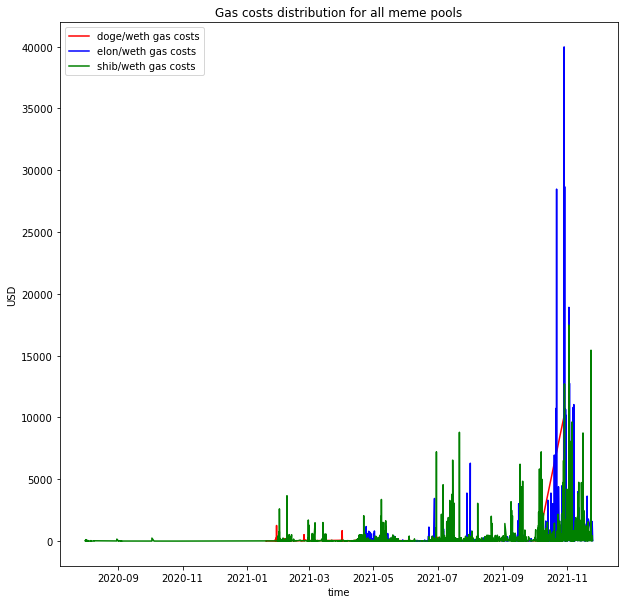

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(doge_weth_profits_df['timestamp'], doge_weth_profits_df['gas_costs_usd'], color='r', label='doge/weth gas costs')
ax.plot(elon_weth_profits_df['timestamp'], elon_weth_profits_df['gas_costs_usd'], color='b', label='elon/weth gas costs')
ax.plot(shib_weth_profits_df['timestamp'], shib_weth_profits_df['gas_costs_usd'], color='g', label='shib/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all meme pools')
ax.legend()
plt.show()

## Classic pools

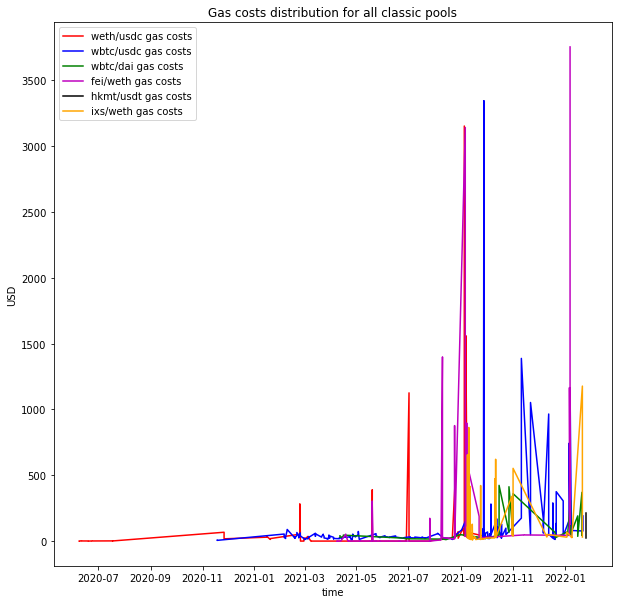

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(weth_usdc_profits_df['timestamp'], weth_usdc_profits_df['gas_costs_usd'], color='r', label='weth/usdc gas costs')
ax.plot(wbtc_usdc_profits_df['timestamp'], wbtc_usdc_profits_df['gas_costs_usd'], color='b', label='wbtc/usdc gas costs')
ax.plot(wbtc_dai_profits_df['timestamp'], wbtc_dai_profits_df['gas_costs_usd'], color='g', label='wbtc/dai gas costs')
ax.plot(fei_weth_profits_df['timestamp'], fei_weth_profits_df['gas_costs_usd'], color='m', label='fei/weth gas costs')
ax.plot(hkmt_usdt_profits_df['timestamp'], hkmt_usdt_profits_df['gas_costs_usd'], color='black', label='hkmt/usdt gas costs')
ax.plot(ixs_weth_profits_df['timestamp'], ixs_weth_profits_df['gas_costs_usd'], color='orange', label='ixs/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all classic pools')
ax.legend()
plt.show()

## Shares STO pools

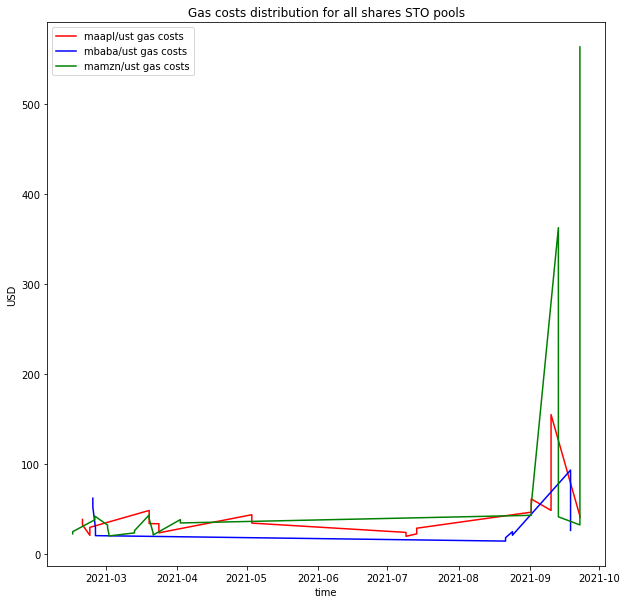

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['gas_costs_usd'], color='r', label='maapl/ust gas costs')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['gas_costs_usd'], color='b', label='mbaba/ust gas costs')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['gas_costs_usd'], color='g', label='mamzn/ust gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all shares STO pools')
ax.legend()
plt.show()

## Non shares STO pools

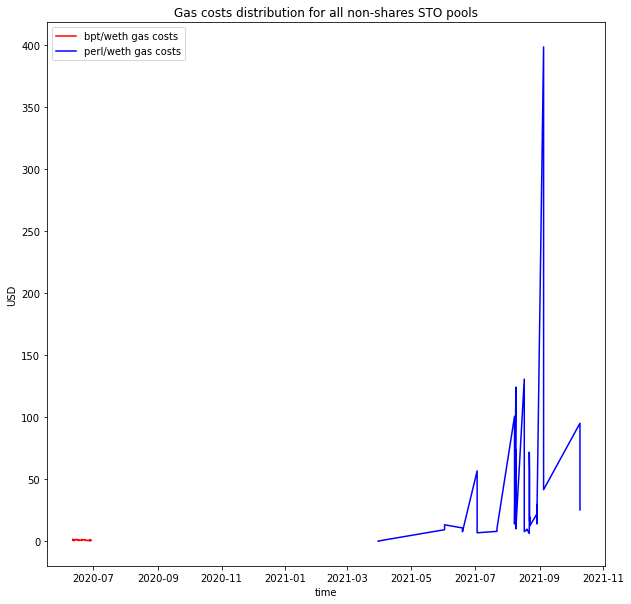

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['gas_costs_usd'], color='r', label='bpt/weth gas costs')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['gas_costs_usd'], color='b', label='perl/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD')
ax.set_title('Gas costs distribution for all non-shares STO pools')
ax.legend()
plt.show()

## Total STO pools

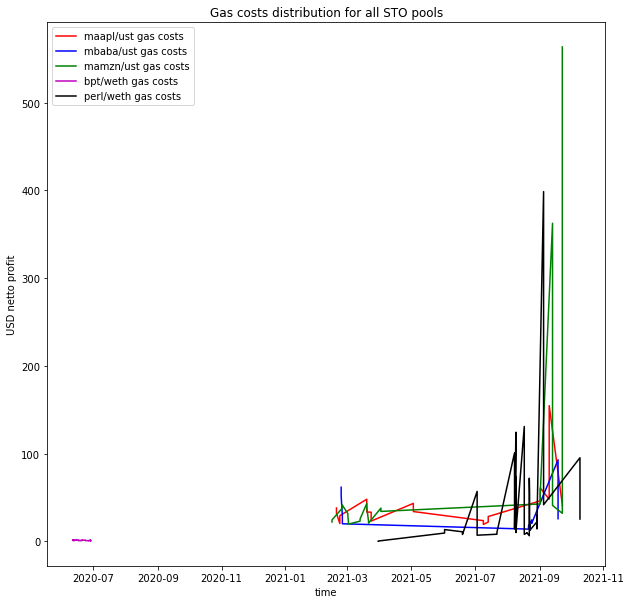

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(maapl_ust_profits_df['timestamp'], maapl_ust_profits_df['gas_costs_usd'], color='r', label='maapl/ust gas costs')
ax.plot(mbaba_ust_profits_df['timestamp'], mbaba_ust_profits_df['gas_costs_usd'], color='b', label='mbaba/ust gas costs')
ax.plot(mamzn_ust_profits_df['timestamp'], mamzn_ust_profits_df['gas_costs_usd'], color='g', label='mamzn/ust gas costs')
ax.plot(bpt_weth_profits_df['timestamp'], bpt_weth_profits_df['gas_costs_usd'], color='m', label='bpt/weth gas costs')
ax.plot(perl_weth_profits_df['timestamp'], perl_weth_profits_df['gas_costs_usd'], color='black', label='perl/weth gas costs')
ax.set_xlabel('time')
ax.set_ylabel('USD netto profit')
ax.set_title('Gas costs distribution for all STO pools')
ax.legend()
plt.show()

# Analyzing MEV attackers

In [23]:
total_profits_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [24]:
total_profits_df

,timestamp,sender,amount_usd,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,130.226365,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,10224660.0,188.0,0.822650,4.017321e-08,99040.0,0.978427,-0.155777,ENJ/WETH
1,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,129.676004,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,10224660.0,175.0,0.822650,4.017321e-08,125049.0,1.235373,-0.412722,ENJ/WETH
2,2020-06-21 01:48:01,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,103.673264,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x263039051ae2d90c7df6aac281f1cea72fd8cb884044...,10306250.0,162.0,0.512858,2.100000e-08,99838.0,0.478867,0.033990,MANA/WETH
3,2020-06-21 01:48:01,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,103.324412,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xdc55cd0b06400b1145028d27ac0cb1444451f8637771...,10306250.0,155.0,0.512858,2.100000e-08,125902.0,0.603882,-0.091024,MANA/WETH
4,2020-06-24 18:06:50,0xeca2e07abc83c78a7178c46b84962af86de342ff,231.717919,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...,10330038.0,4.0,4.298381,7.250000e-08,99132.0,1.670445,2.627936,ENJ/WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-08-29 08:54:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,NaN,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xfd687f6a1e0ead8abee8d7d719dda5dd338893a06881...,13119424.0,1.0,53.358970,5.373985e-08,109143.0,18.964492,34.394478,PERL/WETH
76,2021-09-04 18:03:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,NaN,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x3931b57b3b6c64e60a544c45999e9292f681dd151c8c...,13160741.0,2.0,488.918520,1.237054e-06,82931.0,398.580177,90.338343,PERL/WETH
77,2021-09-04 18:03:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,NaN,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xeced0afc163e25d502c0f54273227775aaf7b11d3a56...,13160741.0,0.0,488.918520,1.173117e-07,91375.0,41.646536,447.271984,PERL/WETH
78,2021-10-09 12:22:48,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,NaN,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x7a3036b78041bcbb07666996746d631607994a10017e...,13384508.0,5.0,126.178133,3.297323e-07,80641.0,95.190359,30.987775,PERL/WETH


In [25]:
counts_df = total_profits_df['sender'].value_counts()
counts_df = pd.DataFrame({'sender': counts_df.index, 'value': counts_df})
counts_df.reset_index(inplace=True)
counts_df.drop(columns=['index'], inplace=True)
counts_df.head(10)

,sender,value
0,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,3574
1,0xd78a3280085ee846196cb5fab7d510b279486d44,3106
2,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,2628
3,0x000000005736775feb0c8568e7dee77222a26880,1996
4,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1219
5,0x00000000003b3cc22af3ae1eac0440bcee416b40,1146
6,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,1004
7,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,822
8,0x000000000000084e91743124a982076c59f10084,794
9,0x66f049111958809841bbe4b81c034da2d953aa0c,638


## Top attacker

In [26]:
print('first record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['timestamp'].min()
))
print('last record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['timestamp'].max()
))

first record = 2021-04-12 12:35:43
last record = 2021-08-13 22:51:17


In [27]:
print(total_profits_df[total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['netto_profit'].sum() / 2)

1683534.8261818478


In [28]:
print(total_profits_df[total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de']['pool_name'].unique())

['SHIB/WETH' 'ELON/WETH']


In [29]:
print(total_profits_df[(total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit'].sum() / 2)

1251265.5203316058


In [30]:
print(total_profits_df[(total_profits_df['sender'] == '0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit'].sum() / 2)

432269.305850242


## Second place attacker

In [31]:
print('first record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['timestamp'].min()
))
print('last record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['timestamp'].max()
))

first record = 2021-04-05 04:07:41
last record = 2021-05-25 11:26:13


In [32]:
print(total_profits_df[total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['netto_profit'].sum() / 2)

1559101.5804745932


In [33]:
print(total_profits_df[total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44']['pool_name'].unique())

['ENJ/WETH' 'SAND/WETH' 'MANA/WETH' 'ALICE/WETH' 'AXS/WETH' 'SHIB/WETH'
 'DOGE/WETH' 'ELON/WETH' 'WETH/USDC' 'FEI/WETH']


In [34]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit']) / 2)

16853.012007059908
68.0


In [35]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit']) / 2)

2337.911190740477
7.0


In [36]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit']) / 2)

19054.706522581277
40.0


In [37]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit']) / 2)

588.4625023377494
6.0


In [38]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'AXS/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'AXS/WETH')]['netto_profit']) / 2)

539.3422760321696
1.0


In [39]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit']) / 2)

987681.9768638457
800.0


In [40]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit']) / 2)

14630.130396190427
48.0


In [41]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit']) / 2)

24768.249537427782
12.0


In [42]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit']) / 2)

79234.91188488128
29.0


In [43]:
print(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0xd78a3280085ee846196cb5fab7d510b279486d44') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit']) / 2)

413412.87729349657
542.0


## Third attacker

In [44]:
print('first record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['timestamp'].min()
))
print('last record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['timestamp'].max()
))

first record = 2021-04-14 23:21:58
last record = 2021-08-10 16:12:22


In [45]:
print(total_profits_df[total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['netto_profit'].sum() / 2)

1418072.2789220982


In [46]:
print(total_profits_df[total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e']['pool_name'].unique())

['SAND/WETH' 'MANA/WETH' 'ENJ/WETH' 'ALICE/WETH' 'DOGE/WETH' 'SHIB/WETH'
 'ELON/WETH' 'WETH/USDC' 'FEI/WETH']


In [47]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit']) / 2)

3176.845809741005
1.0


In [48]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit']) / 2)

74349.49440275338
20.0


In [49]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit']) / 2)

9823.813079645111
8.0


In [50]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit']) / 2)

14.677740064443158
1.0


In [51]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit']) / 2)

199.01689036868197
1.0


In [52]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit']) / 2)

3723.752386422367
6.0


In [53]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit']) / 2)

1406.7128401171044
1.0


In [54]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit']) / 2)

1063626.046767435
395.0


In [55]:
print(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit']) / 2)

261751.91900555103
69.0


## Fourth attacker

In [56]:
print('first record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880']['timestamp'].min()
))
print('last record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880']['timestamp'].max()
))

first record = 2021-04-15 14:38:52
last record = 2021-11-24 15:27:53


In [57]:
print(total_profits_df[total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880']['netto_profit'].sum() / 2)

1100027.781229288


In [58]:
print(total_profits_df[total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880']['pool_name'].unique())

['SAND/WETH' 'ENJ/WETH' 'MANA/WETH' 'AXS/WETH' 'SHIB/WETH' 'ELON/WETH'
 'PERL/WETH']


In [59]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'PERL/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'PERL/WETH')]['netto_profit']) / 2)

287.18844054450045
5.0


In [60]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'AXS/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'AXS/WETH')]['netto_profit']) / 2)

13.539353566284145
1.0


In [61]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit']) / 2)

19595.292661016938
40.0


In [62]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit']) / 2)

5717.764745470345
22.0


In [63]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit']) / 2)

17022.267066734123
40.0


In [64]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit']) / 2)

698409.4095991836
530.0


In [65]:
print(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x000000005736775feb0c8568e7dee77222a26880') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit']) / 2)

358982.31936277234
360.0


## Fifth attacker (unique case)

In [66]:
print('first record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['timestamp'].min()
))
print('last record = ' + str(
    total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['timestamp'].max()
))

first record = 2020-08-01 00:03:09
last record = 2021-07-29 00:39:55


In [67]:
print(total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['netto_profit'].sum() / 2)

448167.8011824454


In [68]:
print(total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['pool_name'].unique())

['MANA/WETH' 'SAND/WETH' 'ENJ/WETH' 'ALICE/WETH' 'SHIB/WETH' 'DOGE/WETH'
 'ELON/WETH' 'WETH/USDC' 'FEI/WETH' 'mAMZN/UST' 'mAAPL/UST' 'mBABA/UST']


In [69]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'MANA/WETH')]['netto_profit']) / 2)

3654.7438762208276
27.0


In [70]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'SAND/WETH')]['netto_profit']) / 2)

9869.168998099047
25.0


In [71]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ENJ/WETH')]['netto_profit']) / 2)

9625.4125488583
26.0


In [72]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ALICE/WETH')]['netto_profit']) / 2)

1175.1620692376725
6.0


In [73]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'DOGE/WETH')]['netto_profit']) / 2)

5003.097024118741
17.0


In [74]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'WETH/USDC')]['netto_profit']) / 2)

18388.56176107983
12.0


In [75]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'FEI/WETH')]['netto_profit']) / 2)

10659.300716879032
2.0


In [76]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mAAPL/UST')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mAAPL/UST')]['netto_profit']) / 2)

1257.0830267915906
4.0


In [77]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mBABA/UST')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mBABA/UST')]['netto_profit']) / 2)

519.6694524705528
2.0


In [78]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mAMZN/UST')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'mAMZN/UST')]['netto_profit']) / 2)

5307.465287381581
8.0


In [79]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'SHIB/WETH')]['netto_profit']) / 2)

285341.6137773738
366.0


In [80]:
print(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit'].sum() / 2)
print(len(total_profits_df[(total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d') &
                       (total_profits_df['pool_name'] == 'ELON/WETH')]['netto_profit']) / 2)

97366.52264393434
114.5


In [81]:
total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['txd'][1]

'0x6ba78d0e2fbf892a6a72c51c79c8557f2c34d64a06525ee7730aabcfa90746ca'

In [82]:
total_profits_df[total_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d'].loc[0]

timestamp                                           2021-02-14 12:41:49
sender                       0x7a250d5630b4cf539739df2c5dacb4c659f2488d
amount_usd                                                          NaN
to                           0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef
txd                   0x514a2d8c72567cd6688076d501893e39f762d99973cf...
block                                                        11854877.0
block_position                                                    130.0
bruto_total_profit                                           254.103086
tx_fee                                                              0.0
gas_usage_by_tx                                                110222.0
gas_costs_usd                                                 21.935563
netto_profit                                                 232.167522
pool_name                                                     mAMZN/UST
Name: 0, dtype: object

## Attackers top by count of attacks

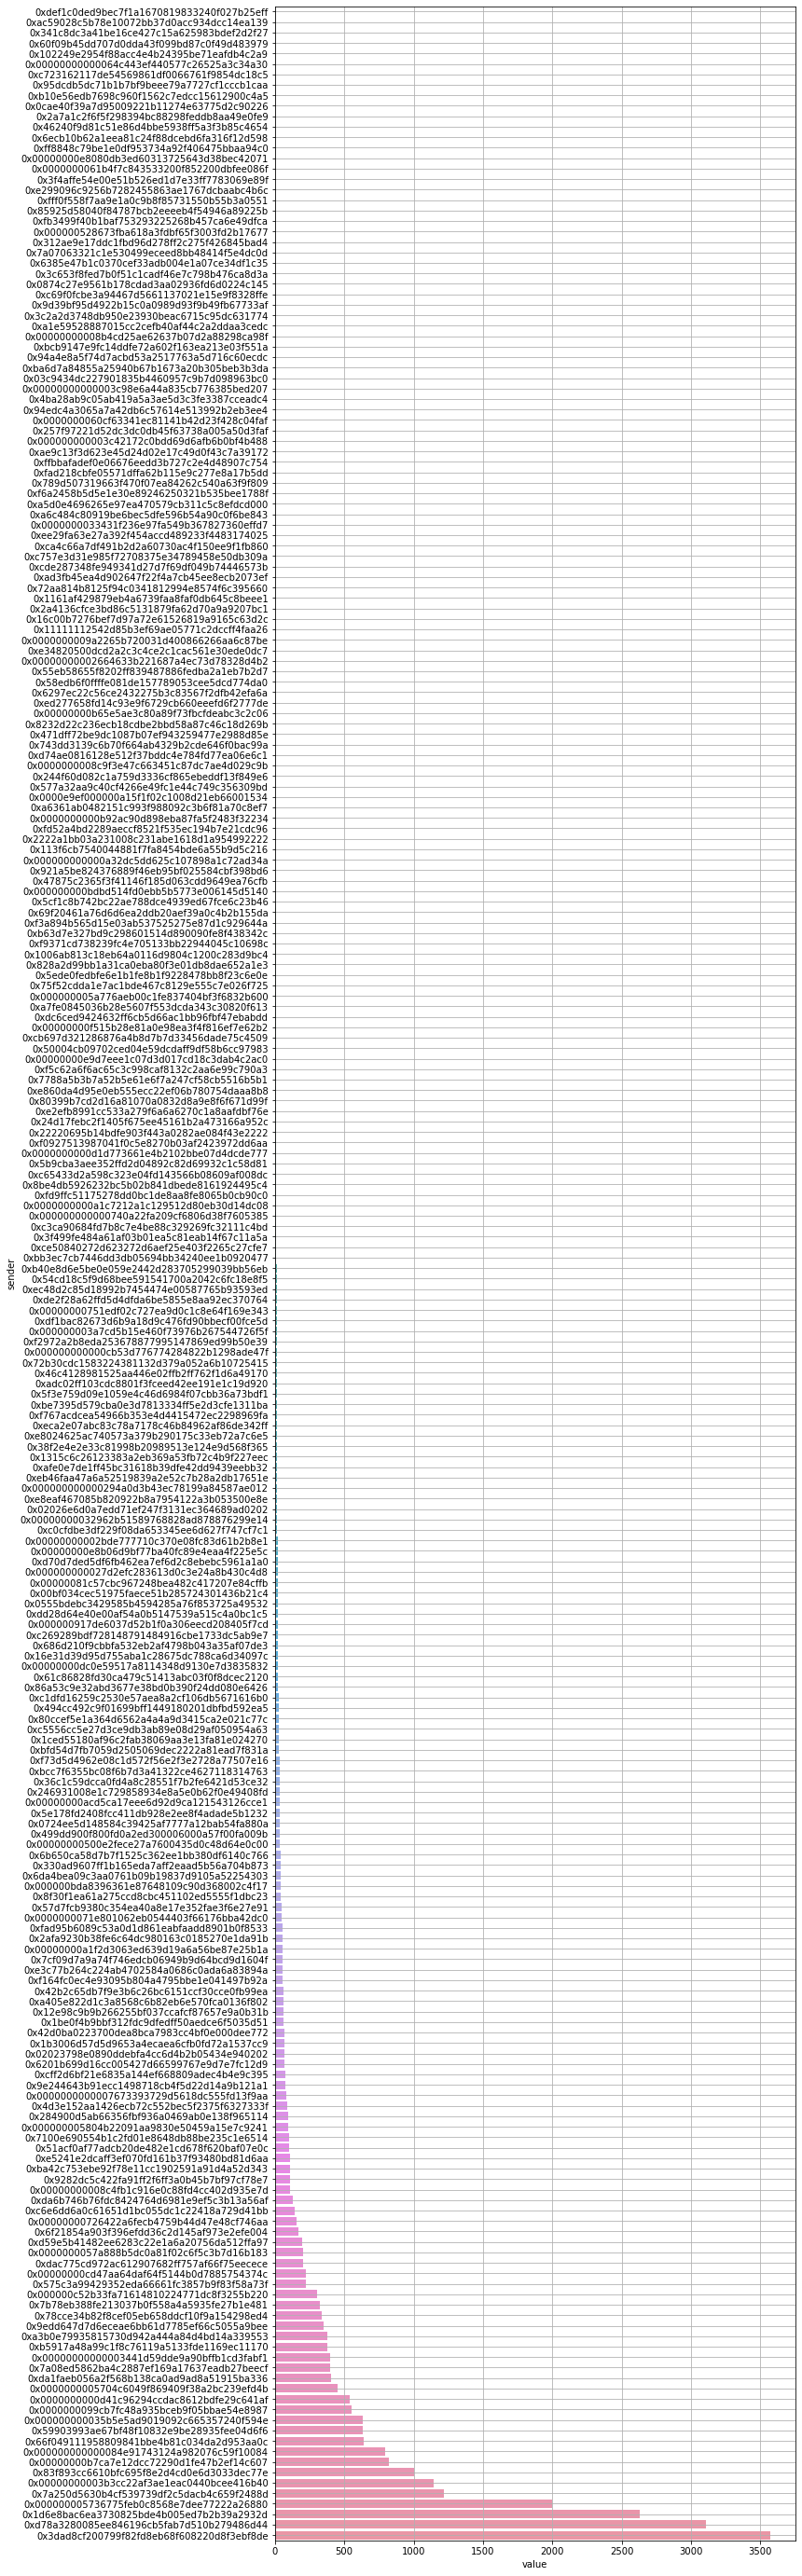

In [83]:
plt.figure(figsize=(10, 50))
sns.barplot(data=counts_df, y='sender', x='value', order=counts_df.sort_values(by='value').sender)
plt.grid(True)
plt.show()

In [84]:
grouped_mevs_df = total_profits_df.groupby(by='sender').sum()
grouped_mevs_df.drop(columns=['block', 'block_position'], inplace=True)
grouped_mevs_df.reset_index(inplace=True)
grouped_mevs_df['netto_profit'] = (grouped_mevs_df['bruto_total_profit'] / 2) - grouped_mevs_df['gas_costs_usd']
grouped_mevs_df.sort_values(by=['netto_profit'])

,sender,amount_usd,bruto_total_profit,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit
65,0x11111112542d85b3ef69ae05771c2dccff4faa26,6.583767e+04,0.000000e+00,1.212000e-06,270743.0,413.636575,-4.136366e+02
127,0x69f20461a76d6d6ea2ddb20aef39a0c4b2b155da,5.142502e+03,6.121088e+01,1.114200e-06,614706.0,149.637641,-1.190322e+02
230,0xf6a2458b5d5e1e30e89246250321b535bee1788f,3.641979e+03,5.208760e+00,2.524907e-07,194108.0,63.098999,-6.049462e+01
240,0xffbbafadef0e06676eedd3b727c2e4d48907c754,1.298819e+03,1.693041e+01,1.651444e-06,156364.0,44.532270,-3.606707e+01
191,0xc69f0fcbe3a94467d5661137021e15e9f8328ffe,1.082195e+04,4.679841e+01,3.000000e-07,209351.0,48.111259,-2.471205e+01
...,...,...,...,...,...,...,...
29,0x000000005736775feb0c8568e7dee77222a26880,2.657072e+08,2.475062e+06,8.860314e-04,132815019.0,275006.929499,9.625243e+05
75,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,2.972600e+08,3.661314e+06,2.582531e-03,190117467.0,703434.786721,1.127222e+06
149,0x83f893cc6610bfc695f8e2d4cd0e6d3033dec77e,2.916654e+08,2.848493e+06,5.740951e-05,69259439.0,12348.503862,1.411898e+06
203,0xd78a3280085ee846196cb5fab7d510b279486d44,3.725482e+08,3.119089e+06,3.106000e-06,304738490.0,886.176494,1.558658e+06


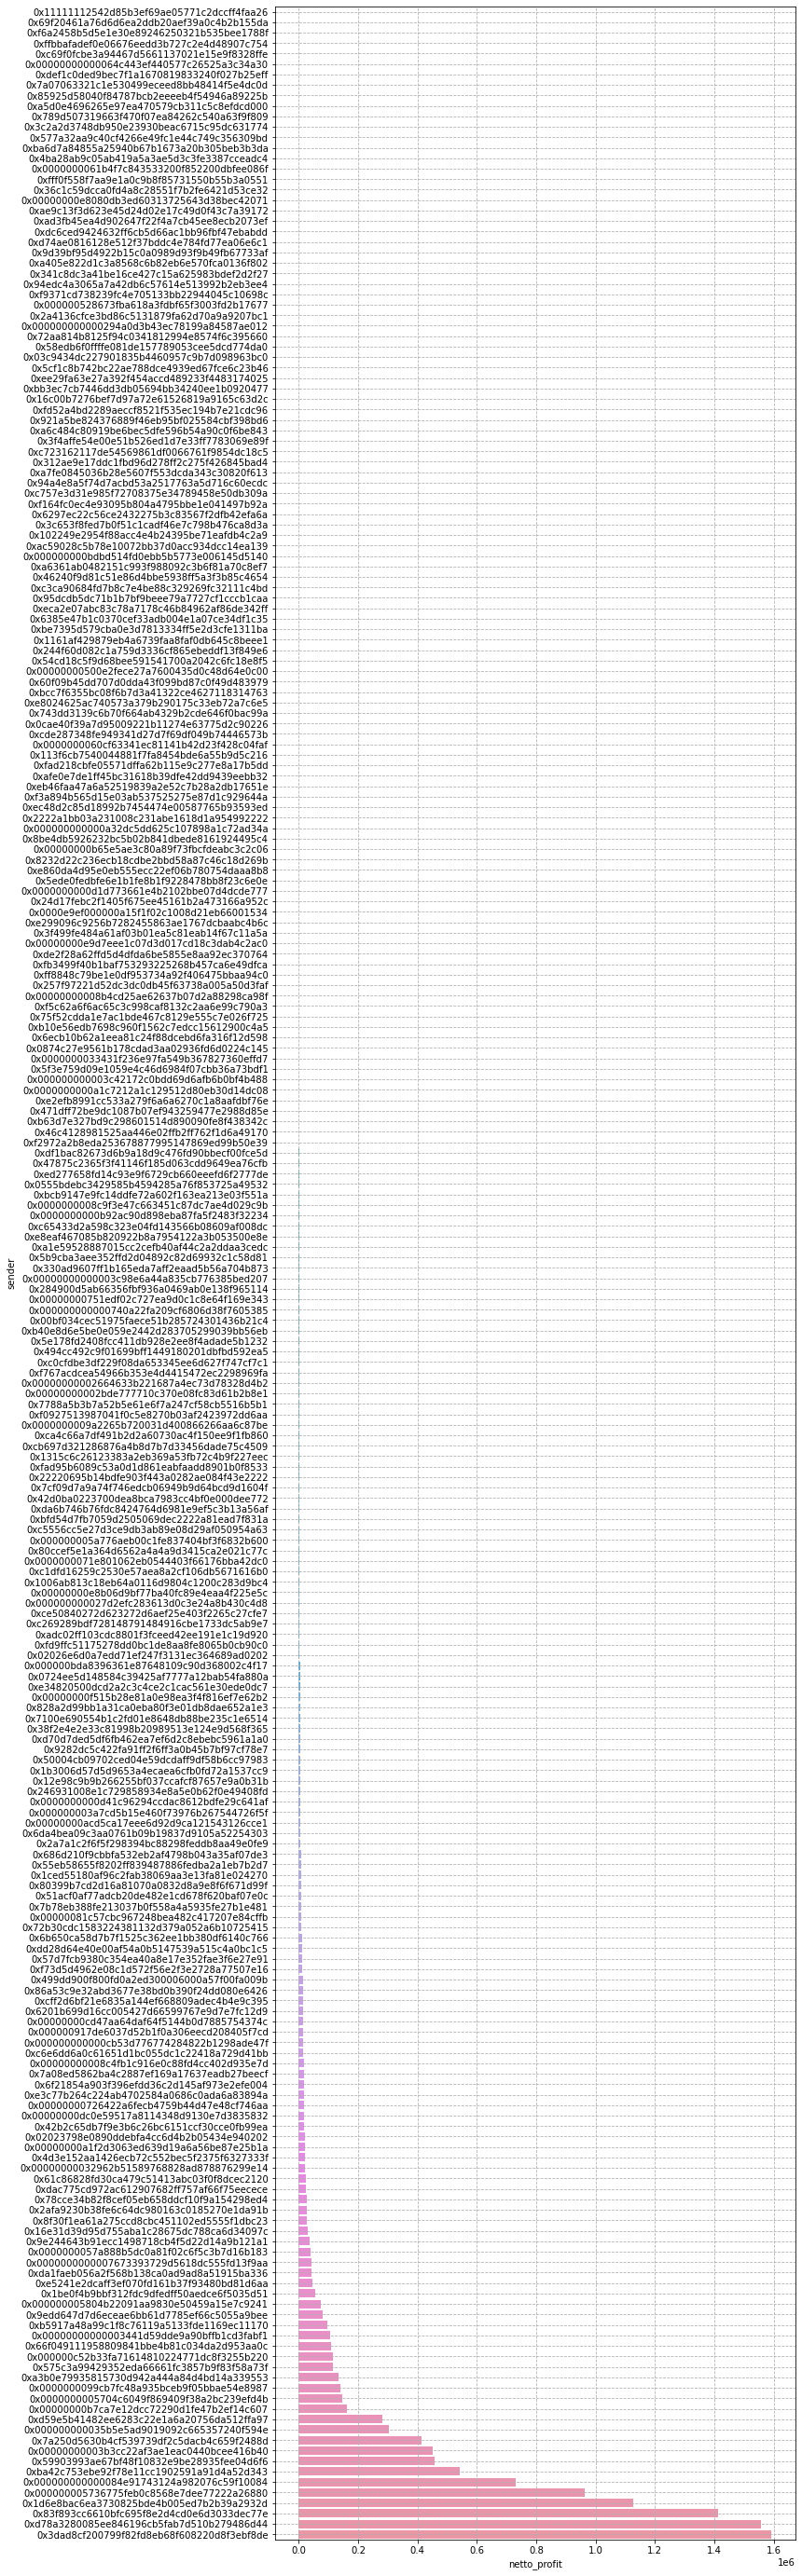

In [85]:
plt.figure(figsize=(10, 50))
sns.barplot(data=grouped_mevs_df, y='sender', x='netto_profit', 
            order=grouped_mevs_df.sort_values('netto_profit').sender)
plt.grid(True, linestyle='--')
plt.show()

## Values distribution

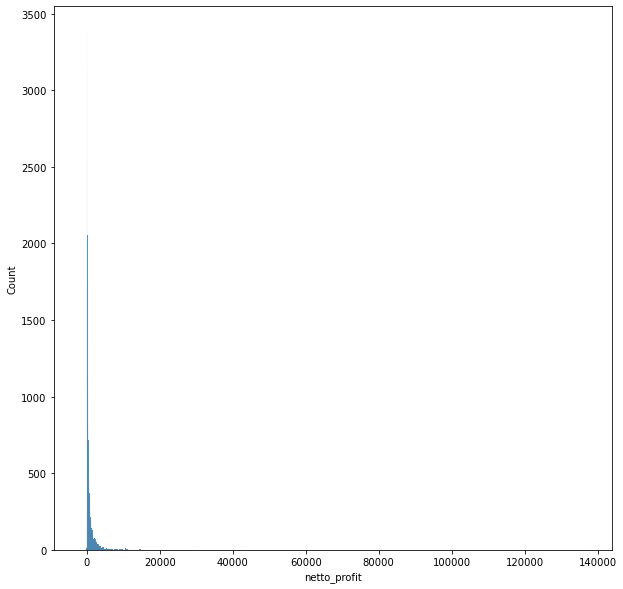

In [87]:
plt.figure(figsize=(10, 10))
sns.histplot(data=total_profits_df, x='netto_profit')
plt.show()

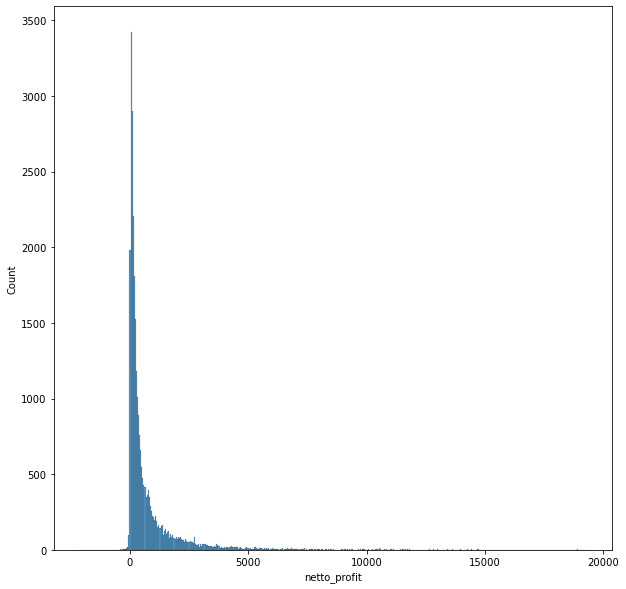

In [89]:
plt.figure(figsize=(10, 10))
sns.histplot(data=total_profits_df[total_profits_df['netto_profit'] < 20000], x='netto_profit')
plt.show()

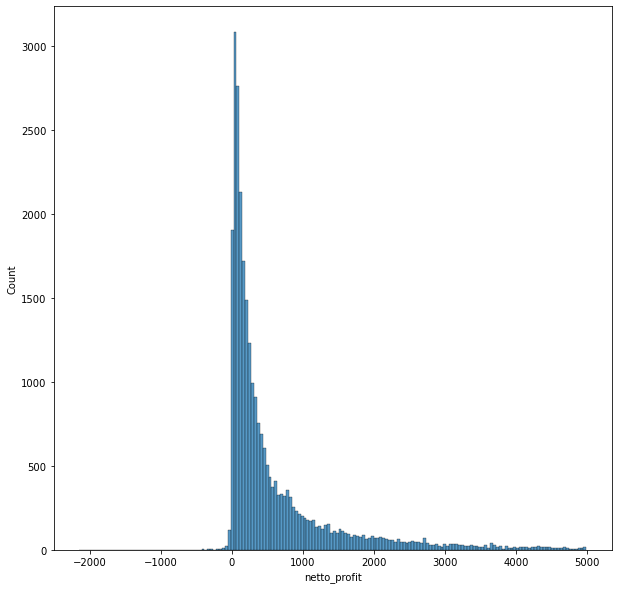

In [90]:
plt.figure(figsize=(10, 10))
sns.histplot(data=total_profits_df[total_profits_df['netto_profit'] < 5000], x='netto_profit')
plt.show()

In [94]:
len(total_profits_df['pool_name'].unique())

19

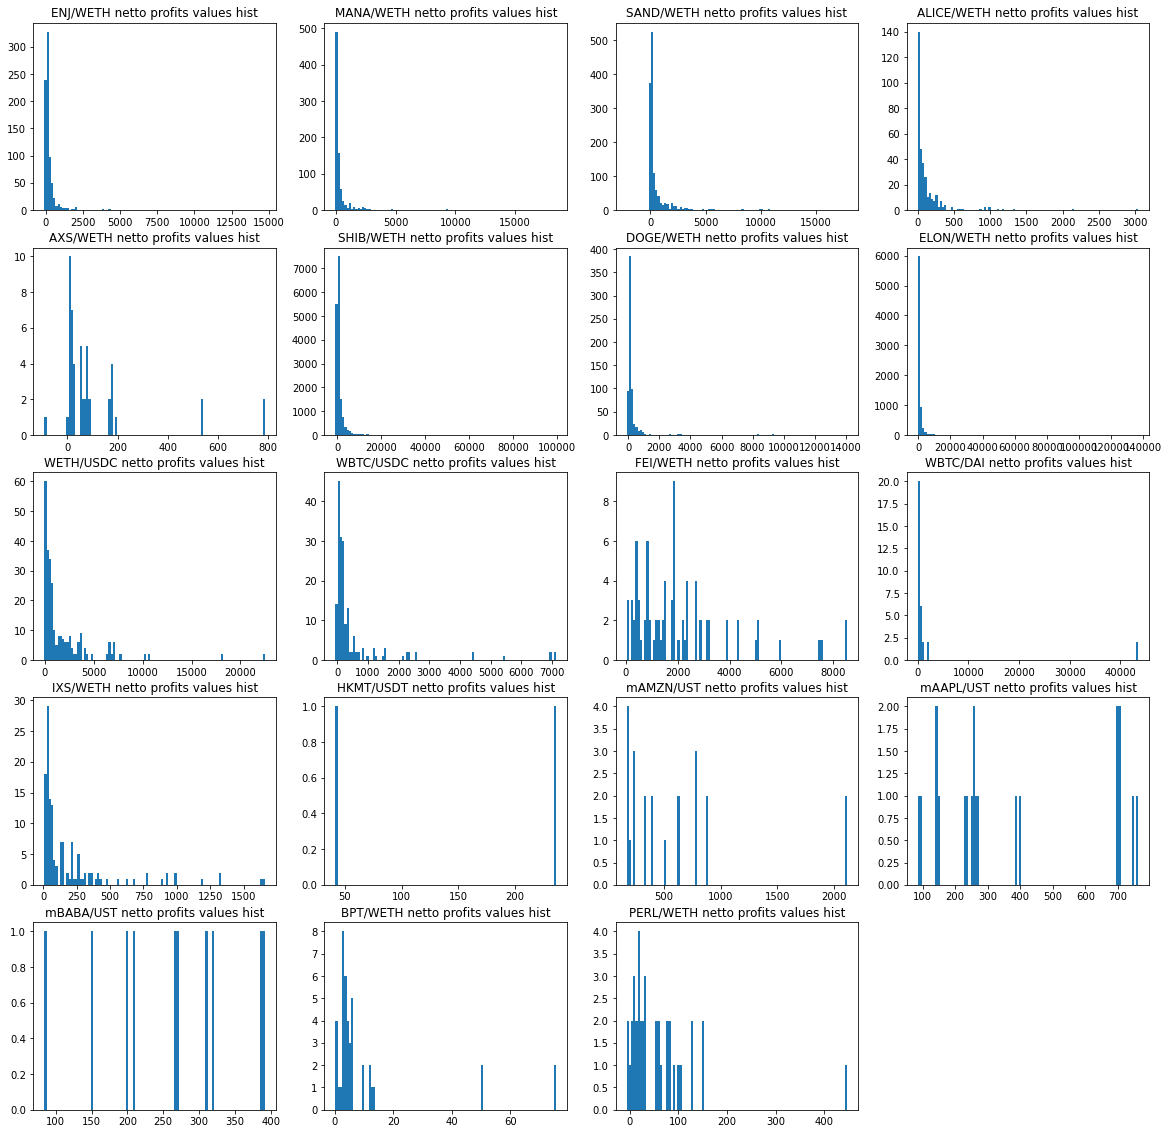

In [106]:
row_size = 5
column_size = 4

plt.figure(figsize=(20, 20))

row_index = 0
column_index = 0
for pool in total_profits_df['pool_name'].unique():
    plt.subplot(row_size, column_size, (row_index * column_size) + column_index + 1)
    plt.hist(total_profits_df[total_profits_df['pool_name'] == pool]['netto_profit'], bins=100)
    plt.title(str(pool) + ' netto profits values hist')
    column_index += 1
    if (column_index == column_size):
        column_index = 0
        row_index += 1

fig.tight_layout()        
plt.show()

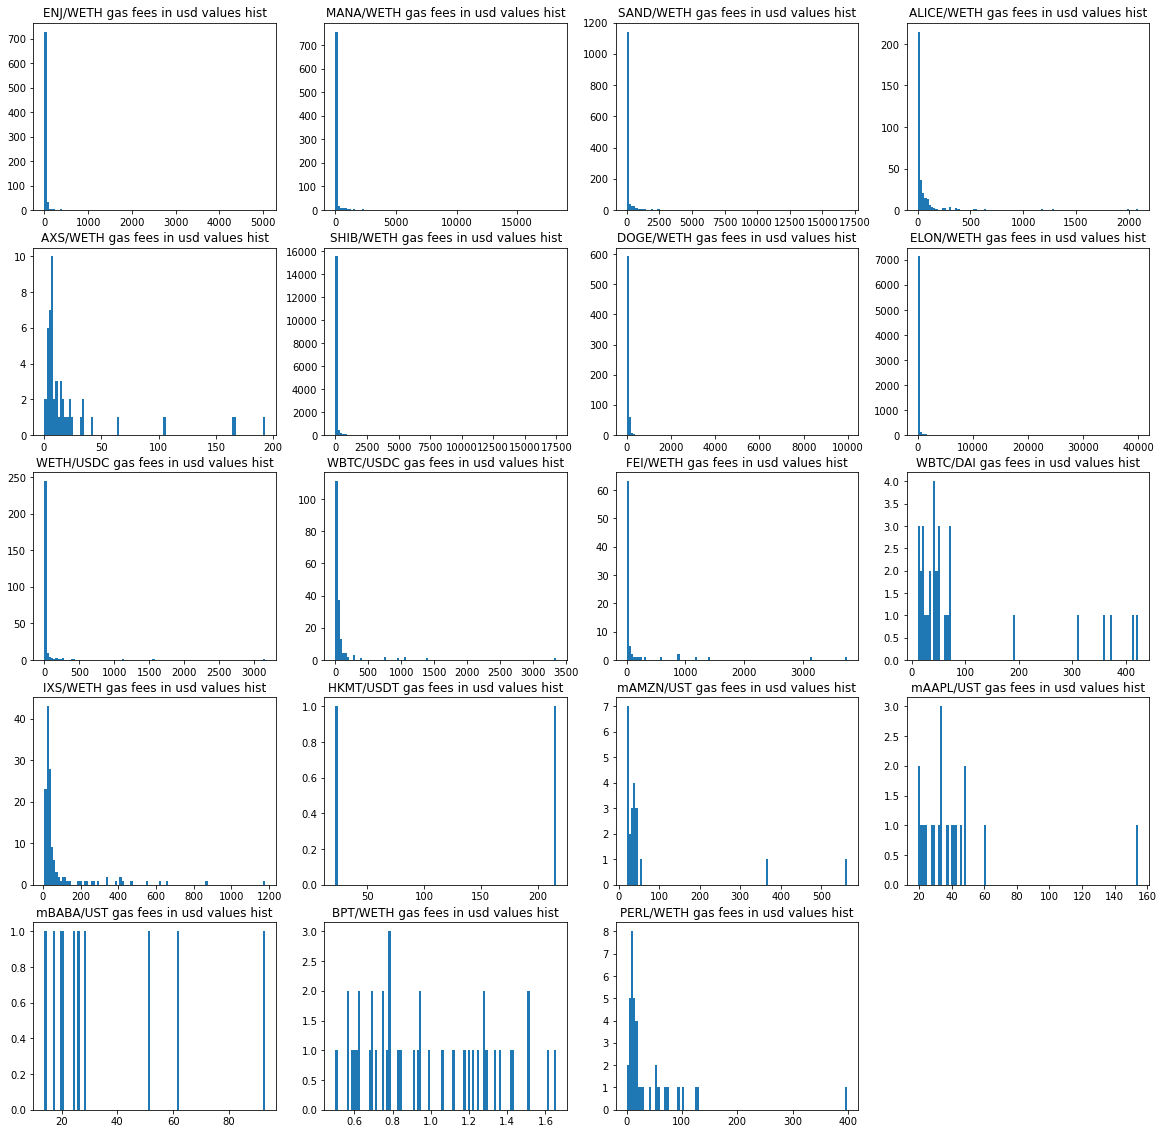

In [107]:
row_size = 5
column_size = 4

plt.figure(figsize=(20, 20))

row_index = 0
column_index = 0
for pool in total_profits_df['pool_name'].unique():
    plt.subplot(row_size, column_size, (row_index * column_size) + column_index + 1)
    plt.hist(total_profits_df[total_profits_df['pool_name'] == pool]['gas_costs_usd'], bins=100)
    plt.title(str(pool) + ' gas fees in usd values hist')
    column_index += 1
    if (column_index == column_size):
        column_index = 0
        row_index += 1

fig.tight_layout()        
plt.show()